In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import statsmodels.formula as smf
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import folium 

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [3]:
# looking at the types of data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
# see if there are any null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
# dropping columns that is recommended to drop for me
#
#

In [6]:
df = df.drop(columns = ['view', 'sqft_above', 'sqft_basement', 'yr_renovated',
                        'sqft_living15', 'sqft_lot15'])

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,98178,47.5112,-122.257
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045


In [8]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
lat               0
long              0
dtype: int64

In [9]:
# cleaning waterfront
#

In [10]:
# seeing what kind of values it has
df.waterfront.unique()

array([nan,  0.,  1.])

In [11]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [12]:
df.waterfront.isna().sum()

2376

In [13]:
# replaceing the nan values with 0
df.waterfront = df.waterfront.fillna(0)

In [14]:
# making sure it worked

df.waterfront.unique()

array([0., 1.])

In [15]:

df.waterfront.isna().sum()

0

In [16]:
df.isna().sum()

id             0
date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
zipcode        0
lat            0
long           0
dtype: int64

In [17]:
#
#
# checking to see if there are any duplicate values

In [18]:
df.duplicated().sum()

0

In [19]:
#
#
# looking at the average house prices

In [20]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,1970.999676,98077.951845,47.560093,-122.213982
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,29.375234,53.513072,0.138552,0.140724
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000,47.471100,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000,47.571800,-122.231000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,98199.000000,47.777600,-121.315000


In [21]:
#
# removing the houses that cost more than $850,000 so i can look at starter homes

In [22]:
df_low_prices = df.drop(df[df.price > 850000].index)
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,47.5112,-122.257
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045


In [23]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,47.5112,-122.257
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045


In [24]:
# looking at what the mean of the prices are now that we dropped the higher priced homes

df_low_prices.price.describe()

count     19165.000000
mean     444937.455622
std      171763.093232
min       78000.000000
25%      308000.000000
50%      422120.000000
75%      565000.000000
max      850000.000000
Name: price, dtype: float64

In [25]:
#
#
# making a month and a year column so i can see what time of year is the best time 
# to buy a house
# 

In [26]:
df_low_prices['date_dateformat'] = pd.to_datetime(df_low_prices['date'])

In [27]:
df_low_prices['month'] = df_low_prices.date_dateformat.dt.month

In [28]:
df_low_prices['year'] = df_low_prices.date_dateformat.dt.year

In [29]:
df_low_prices['age_sold'] = df_low_prices['year'] - df_low_prices['yr_built']

In [30]:
#
# looking at the average age, youngest age and the oldest age of houses sold 

In [31]:
df_low_prices.age_sold.describe()

count    19165.000000
mean        43.699713
std         28.927806
min         -1.000000
25%         19.000000
50%         41.000000
75%         63.000000
max        115.000000
Name: age_sold, dtype: float64

In [32]:
# the average age of houses sold was 43 years old
# the youngest house sold was -1 so it was bought before it was even built
# the oldest house was 115 years old

In [33]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,date_dateformat,month,year,age_sold
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,47.5112,-122.257,2014-10-13,10,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319,2014-12-09,12,2014,63
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233,2015-02-25,2,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393,2014-12-09,12,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045,2015-02-18,2,2015,28


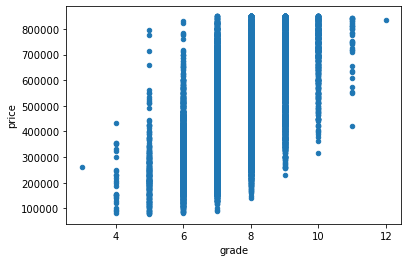

In [34]:
df_low_prices.plot.scatter(x = 'grade', y = 'price')

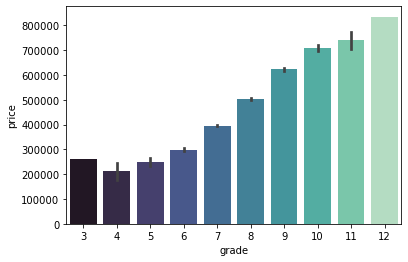

In [35]:
sns.barplot(x = 'grade', y = 'price', data = df_low_prices, palette = 'mako')
# plt.savefig('grade_price.png')

In [36]:
df_months = df.groupby(by = df_low_prices.month).mean()

In [37]:
df_months.head(12)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
month,,,,,,,,,,,,,,
1.0,4.544011e+09,432717.713311,3.335609,2.020193,1908.313993,14216.822526,1.441411,0.003413,3.348123,7.405006,1970.558589,98079.568828,47.545334,-122.214824
2.0,4.628168e+09,428202.557624,3.286348,1.963652,1861.281028,13000.993794,1.437057,0.001773,3.403369,7.362589,1970.830674,98077.853723,47.539557,-122.216631
3.0,4.621795e+09,444789.657592,3.276467,1.954779,1851.949788,14081.466425,1.426195,0.000605,3.339988,7.366606,1970.441621,98078.479734,47.544155,-122.213073
4.0,4.729054e+09,457891.300775,3.284755,1.993282,1869.603618,13143.885271,1.452972,0.002067,3.355556,7.406202,1971.288372,98079.809302,47.551957,-122.213341
5.0,4.672661e+09,449510.722795,3.271107,2.002111,1899.670263,15721.538931,1.453565,0.001407,3.412758,7.437148,1970.184803,98080.196060,47.557722,-122.214100
6.0,4.626459e+09,453561.519979,3.330179,2.044821,1933.896425,13654.105152,1.471083,0.002629,3.449527,7.488433,1970.431651,98080.968454,47.557631,-122.213674
7.0,4.627296e+09,452051.876594,3.314125,2.031234,1938.160122,13212.214686,1.483937,0.001530,3.435492,7.494136,1971.447731,98075.436512,47.553493,-122.206672
8.0,4.624538e+09,442707.637420,3.271935,2.012929,1899.233004,13676.805927,1.459326,0.001162,3.438117,7.444509,1971.271354,98077.887275,47.557798,-122.210114
9.0,4.533074e+09,447155.970680,3.297567,2.049127,1929.390518,14743.004367,1.462882,0.002495,3.420462,7.457268,1970.804117,98078.827199,47.554384,-122.211638


In [38]:
months = []
for value in df_low_prices['month']:
    if value == 1:
        months.append('Jan')
    elif value == 2:
        months.append('Feb')
    elif value == 3:
        months.append('Mar')
    elif value == 4:
        months.append('Apr')
    elif value == 5:
        months.append('May')
    elif value == 6:
        months.append('Jun')
    elif value == 7:
        months.append('Jul')
    elif value == 8:
        months.append('Aug')
    elif value == 9:
        months.append('Sep')
    elif value == 10:
        months.append('Oct')
    elif value == 11:
        months.append('Nov')
    elif value == 12:
        months.append('Dec')
        
df_low_prices['name_of_month'] = months
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,47.5112,-122.257,2014-10-13,10,2014,59,Oct
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319,2014-12-09,12,2014,63,Dec
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233,2015-02-25,2,2015,82,Feb
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393,2014-12-09,12,2014,49,Dec
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045,2015-02-18,2,2015,28,Feb


In [39]:
#
# making Seasons from the name_of_month column

In [40]:
seasons = []
for value in df_low_prices['month']:
    if value >= 12:
        seasons.append('winter')
    elif 1 <= value <= 2:
        seasons.append('winter')
    elif 3 <= value <= 5:
        seasons.append('spring')
    elif 6 <= value <= 8:
        seasons.append('summer')
    else:
        seasons.append('fall')
        
df_low_prices['seasons'] = seasons
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,yr_built,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month,seasons
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,1955,98178,47.5112,-122.257,2014-10-13,10,2014,59,Oct,fall
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,1951,98125,47.7210,-122.319,2014-12-09,12,2014,63,Dec,winter
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,1933,98028,47.7379,-122.233,2015-02-25,2,2015,82,Feb,winter
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,1965,98136,47.5208,-122.393,2014-12-09,12,2014,49,Dec,winter
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,1987,98074,47.6168,-122.045,2015-02-18,2,2015,28,Feb,winter


In [41]:
df_seasons = df_low_prices[['seasons', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
                'condition', 'yr_built', 'lat', 'long', 'month', 'name_of_month', 'age_sold']]

In [42]:
df_seasons.head()

,seasons,price,bedrooms,bathrooms,sqft_living,condition,yr_built,lat,long,month,name_of_month,age_sold
0,fall,221900.0,3,1.00,1180,3,1955,47.5112,-122.257,10,Oct,59
1,winter,538000.0,3,2.25,2570,3,1951,47.7210,-122.319,12,Dec,63
2,winter,180000.0,2,1.00,770,3,1933,47.7379,-122.233,2,Feb,82
3,winter,604000.0,4,3.00,1960,5,1965,47.5208,-122.393,12,Dec,49
4,winter,510000.0,3,2.00,1680,3,1987,47.6168,-122.045,2,Feb,28


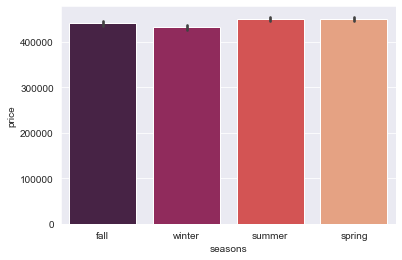

In [43]:
sns.set_style('darkgrid')
sns.barplot(x = 'seasons', y = 'price', data = df_seasons, palette = 'rocket')
# plt.savefig('season_average.png')

In [44]:
# it looks like the best time to buy a house would be in the winter with the lower house prices
#
#

In [45]:
#
# looking at which variables have the highest correlation to price

In [46]:
df_low_prices.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,month,year,age_sold
id,1.000000,0.030206,0.013125,0.035400,0.020783,-0.133586,0.035880,-0.005562,-0.032570,0.046707,0.031457,-0.006202,0.006256,0.022478,-0.008929,0.006030,-0.031357
price,0.030206,1.000000,0.257992,0.407053,0.556399,0.086551,0.253063,0.037831,0.030340,0.575285,0.060310,-0.007422,0.458220,0.083716,-0.009441,-0.001059,-0.060321
bedrooms,0.013125,0.257992,1.000000,0.477493,0.588292,0.020765,0.139866,-0.031407,0.025770,0.294993,0.163020,-0.150498,-0.051498,0.140380,-0.001265,-0.008353,-0.163140
bathrooms,0.035400,0.407053,0.477493,1.000000,0.698601,0.047361,0.500866,-0.022380,-0.139863,0.590919,0.565395,-0.217562,-0.037785,0.251052,0.011783,-0.029508,-0.565818
sqft_living,0.020783,0.556399,0.588292,0.698601,1.000000,0.145016,0.319995,-0.007335,-0.073409,0.661542,0.360336,-0.214556,-0.033978,0.289808,0.016407,-0.031466,-0.360810
sqft_lot,-0.133586,0.086551,0.020765,0.047361,0.145016,1.000000,-0.028619,0.014841,0.002946,0.072397,0.030224,-0.132182,-0.102762,0.217895,0.004467,-0.001804,-0.030250
floors,0.035880,0.253063,0.139866,0.500866,0.319995,-0.028619,1.000000,-0.013723,-0.280315,0.450019,0.524815,-0.071010,0.021242,0.135368,0.015374,-0.023710,-0.525149
waterfront,-0.005562,0.037831,-0.031407,-0.022380,-0.007335,0.014841,-0.013723,1.000000,0.011290,-0.018046,-0.037960,0.036988,-0.040195,-0.054421,0.006710,-0.006329,0.037854
condition,-0.032570,0.030340,0.025770,-0.139863,-0.073409,0.002946,-0.280315,0.011290,1.000000,-0.179681,-0.346129,-0.007579,-0.020145,-0.091013,0.022687,-0.045190,0.345366
grade,0.046707,0.575285,0.294993,0.590919,0.661542,0.072397,0.450019,-0.018046,-0.179681,1.000000,0.515322,-0.191178,0.050905,0.227845,0.018948,-0.038838,-0.515901


In [47]:
df_heatmap = df_low_prices.drop(['month','year','age_sold'], axis = 1)

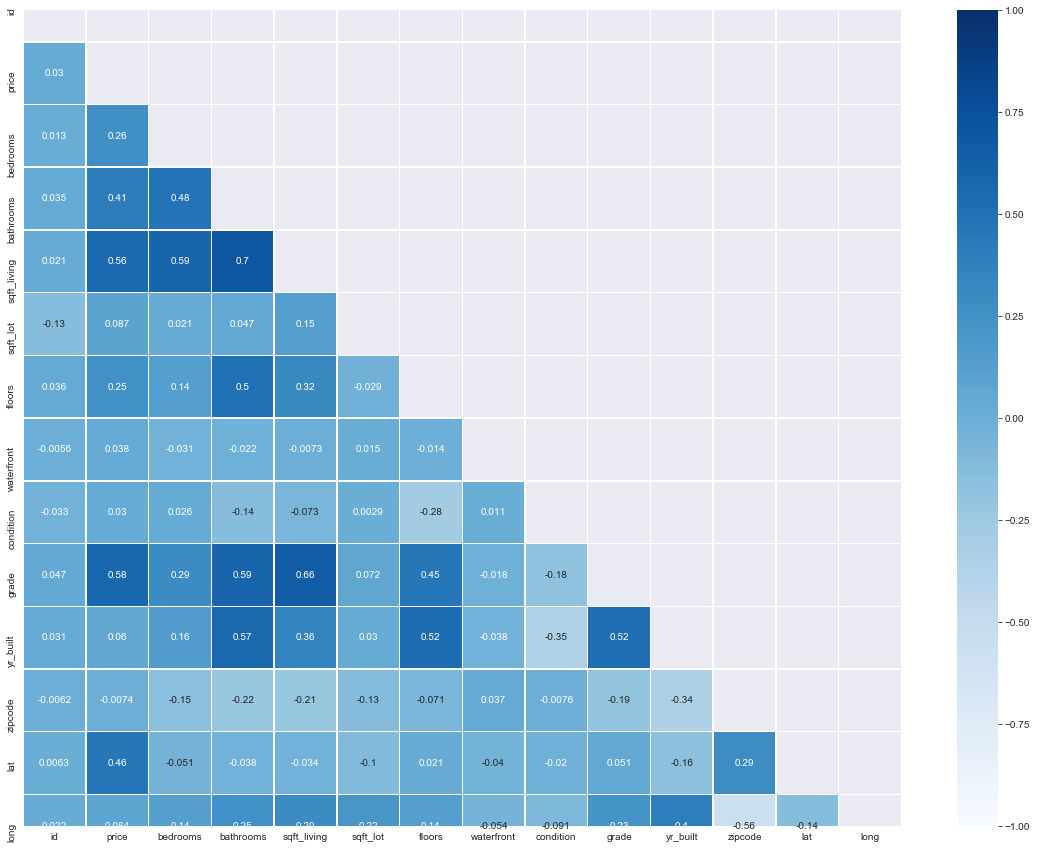

In [48]:
mask = np.zeros_like(df_heatmap.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (20, 15))
sns.heatmap(df_heatmap.corr(), mask = mask, annot = True, square = True,
            linewidth = .5, vmin = -1, vmax = 1, cmap = 'Blues')
# plt.savefig('heatmap_corr.png')

In [49]:
# sqft_living, grade, and bathrooms have the highest correlation to price
#

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9ecea8128>,
      dtype=object)

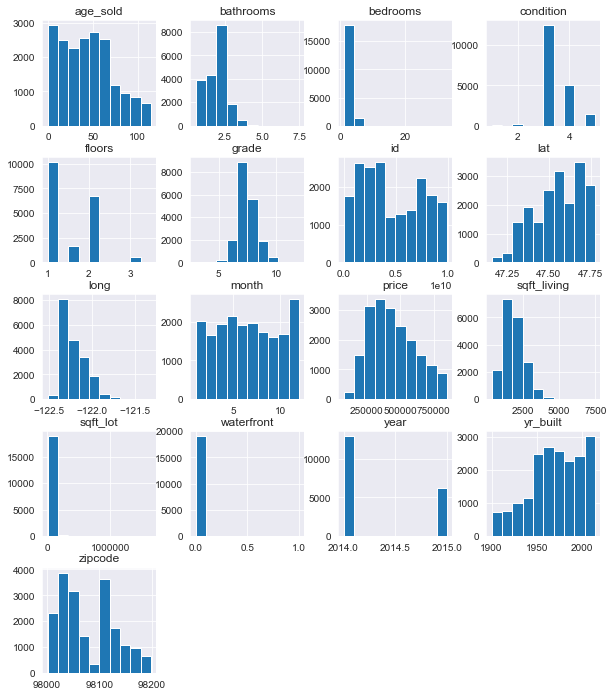

In [50]:
df_low_prices.hist(figsize = (10,12))

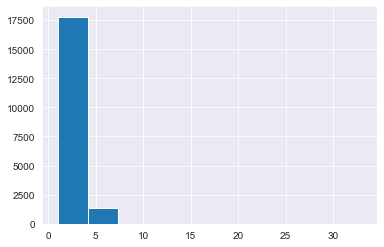

In [51]:
df_low_prices.bedrooms.hist()


In [52]:
df_low_prices.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [53]:
df_low_prices[df_low_prices.bedrooms == 33] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,yr_built,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month,seasons
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,5,...,1947,98103,47.6878,-122.331,2014-06-25,6,2014,67,Jun,summer


In [54]:
df_low_prices.drop(labels = 15856, inplace = True)

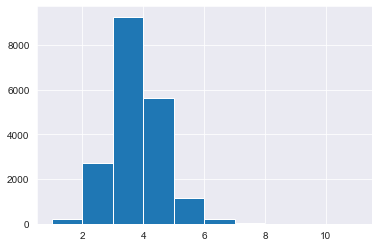

In [55]:
df_low_prices.bedrooms.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9ee602da0>,
      dtype=object)

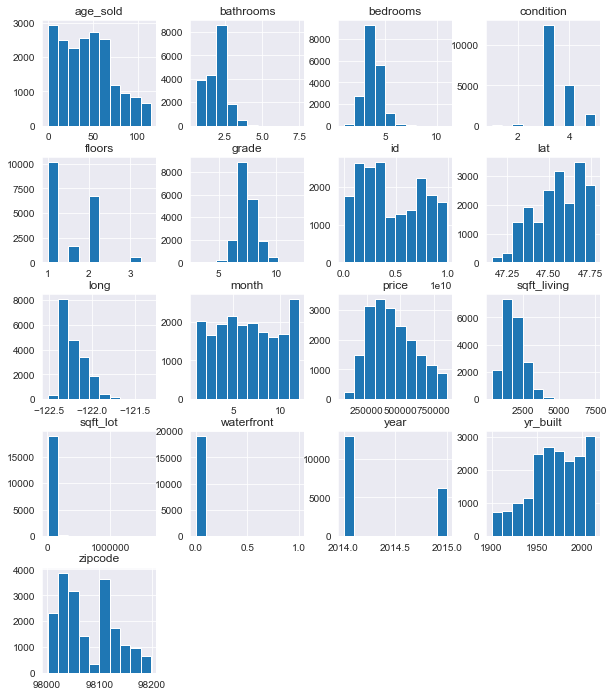

In [56]:
df_low_prices.hist(figsize = (10,12))

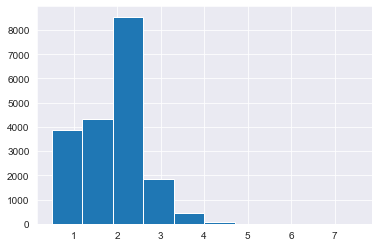

In [57]:
df_low_prices.bathrooms.hist()

In [58]:
df_low_prices.bathrooms.value_counts()

2.50    4852
1.00    3817
1.75    2940
2.00    1854
2.25    1841
1.50    1395
2.75     963
3.00     570
3.50     402
3.25     307
0.75      71
3.75      45
4.00      41
4.50      27
4.25      14
5.00       7
1.25       7
0.50       4
4.75       2
5.25       2
7.50       1
6.75       1
5.75       1
Name: bathrooms, dtype: int64

In [59]:
df_low_prices[df_low_prices.bathrooms == 7.5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,yr_built,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month,seasons
8537,424049043,8/11/2014,450000.0,9,7.5,4050,6504,2.0,0.0,3,...,1996,98144,47.5923,-122.301,2014-08-11,8,2014,18,Aug,summer


In [60]:
df_low_prices.drop(labels = 8537, inplace = True)


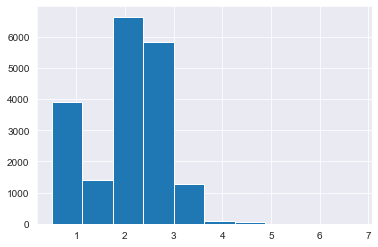

In [61]:
df_low_prices.bathrooms.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9ee7b87f0>,
      dtype=object)

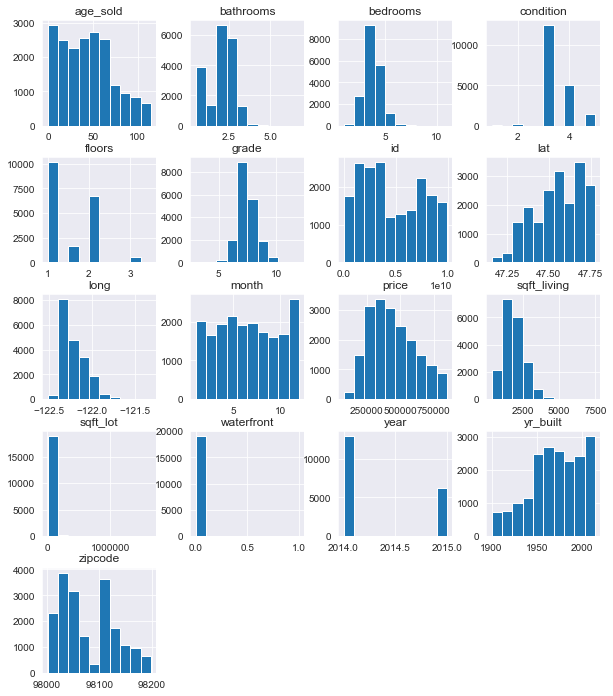

In [62]:
df_low_prices.hist(figsize = (10,12))

In [63]:
#
#
# making a base linear regression model

In [64]:
df_original = pd.read_csv('data/kc_house_data.csv')

In [65]:
outcome = 'price'

x_col = df_original.dropna().drop(['price', 'sqft_basement', 'id', 'date', 'sqft_above',
                                  'sqft_living15'], axis = 1).columns


In [66]:
x_col

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15'],
      dtype='object')

In [67]:
predictors = '+'.join(x_col)
predictors

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+yr_built+yr_renovated+zipcode+lat+long+sqft_lot15'

In [68]:
f = outcome + '~' + predictors
f

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+yr_built+yr_renovated+zipcode+lat+long+sqft_lot15'

In [69]:
model_base = ols(formula = f, data = df_original).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2446.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:28:36   Log-Likelihood:            -2.1507e+05
No. Observations:               15762   AIC:                         4.302e+05
Df Residuals:                   15746   BIC:                         4.303e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.243e+07   3.38e+06      3.682      0.000    5.81e+06    1.91e+07
bedrooms     -3.782e+04   2224.734    -16.998      0.000   -4.22e+04   -3.35e+04
bathrooms     3.944e+04   3824.310     10.314      0.000    3.19e+04    4.69e+04
sqft_living    186.5146      3.678     50.714      0.000     179.306     193.723
sqft_lot         0.0905      0.056      1.609      0.108      -0.020       0.201
floors        1.704e+04   3826.392      4.452      0.000    9534.917    2.45e+04
waterfront    6.131e+05   2.06e+04     29.791      0.000    5.73e+05    6.53e+05
view          5.149e+04   2505.480     20.551      0.000    4.66e+04    5.64e+04
condition     2.423e+04   2780.223      8.714      0.000    1.88e+04    2.97e+04
grade         1.006e+05   2412.252     41.688      0.000    9.58e+04    1.05e+05
yr_built     -2701.0478     86.085    -31.376      0.000   -2869.785   -2532.310
yr_renovated    18.4269      4.371      4.215      0.000       9.858      26.995
zipcode       -596.7359     38.978    -15.310      0.000    -673.136    -520.335
lat           5.953e+05   1.26e+04     47.065      0.000    5.71e+05     6.2e+05
long         -1.833e+05   1.51e+04    -12.143      0.000   -2.13e+05   -1.54e+05
sqft_lot15      -0.3093      0.085     -3.651      0.000      -0.475      -0.143
==============================================================================
Omnibus:                    13686.966   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1479753.525
Skew:                           3.667   Prob(JB):                         0.00
Kurtosis:                      49.897   Cond. No.                     2.09e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
#
#
# making a regression model off of df_low_prices

In [71]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,yr_built,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month,seasons
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,1955,98178,47.5112,-122.257,2014-10-13,10,2014,59,Oct,fall
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,1951,98125,47.7210,-122.319,2014-12-09,12,2014,63,Dec,winter
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,1933,98028,47.7379,-122.233,2015-02-25,2,2015,82,Feb,winter
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,1965,98136,47.5208,-122.393,2014-12-09,12,2014,49,Dec,winter
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,1987,98074,47.6168,-122.045,2015-02-18,2,2015,28,Feb,winter


In [72]:
outcome = 'price'

xcols = df_low_prices.dropna().drop(['price', 'id', 'date', 'date_dateformat', 
                                     'seasons', 'name_of_month', 'month', 'year',
                                    'age_sold'], axis = 1).columns


In [73]:
xcols

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'zipcode', 'lat',
       'long'],
      dtype='object')

In [74]:
predictors = '+'.join(xcols)
predictors

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+yr_built+zipcode+lat+long'

In [75]:
f = outcome + '~' + predictors
f

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+yr_built+zipcode+lat+long'

In [76]:
model_1 = ols(formula = f, data = df_low_prices).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     2949.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:28:41   Log-Likelihood:            -2.4815e+05
No. Observations:               19163   AIC:                         4.963e+05
Df Residuals:                   19150   BIC:                         4.964e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.88e+06   1.51e+06     -3.222      0.001   -7.85e+06   -1.91e+06
bedrooms    -1.169e+04   1100.592    -10.617      0.000   -1.38e+04   -9528.261
bathrooms    2.343e+04   1800.892     13.013      0.000    1.99e+04     2.7e+04
sqft_living    81.5348      1.884     43.275      0.000      77.842      85.228
sqft_lot        0.2307      0.020     11.354      0.000       0.191       0.271
floors       2.655e+04   1752.769     15.146      0.000    2.31e+04       3e+04
waterfront   2.141e+05   1.64e+04     13.065      0.000    1.82e+05    2.46e+05
condition    2.052e+04   1246.583     16.464      0.000    1.81e+04     2.3e+04
grade        7.159e+04   1169.003     61.238      0.000    6.93e+04    7.39e+04
yr_built    -1638.7540     38.923    -42.103      0.000   -1715.046   -1562.462
zipcode      -153.2797     17.581     -8.719      0.000    -187.739    -118.820
lat          5.108e+05   5507.069     92.759      0.000       5e+05    5.22e+05
long         1.236e+04   6671.944      1.853      0.064    -715.292    2.54e+04
==============================================================================
Omnibus:                      693.423   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              918.895
Skew:                           0.391   Prob(JB):                    2.91e-200
Kurtosis:                       3.734   Cond. No.                     2.05e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
#
#
# making dummies for grade

In [78]:
df_grade = pd.get_dummies(df_low_prices['grade'], prefix = 'grade', drop_first = True)

In [79]:
df2 = pd.concat([df_low_prices, df_grade], axis = 1)

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19163 entries, 0 to 21596
Data columns (total 30 columns):
id                 19163 non-null int64
date               19163 non-null object
price              19163 non-null float64
bedrooms           19163 non-null int64
bathrooms          19163 non-null float64
sqft_living        19163 non-null int64
sqft_lot           19163 non-null int64
floors             19163 non-null float64
waterfront         19163 non-null float64
condition          19163 non-null int64
grade              19163 non-null int64
yr_built           19163 non-null int64
zipcode            19163 non-null int64
lat                19163 non-null float64
long               19163 non-null float64
date_dateformat    19163 non-null datetime64[ns]
month              19163 non-null int64
year               19163 non-null int64
age_sold           19163 non-null int64
name_of_month      19163 non-null object
seasons            19163 non-null object
grade_4            19163 no

In [81]:
df2 = df2.drop(['date_dateformat', 'age_sold', 'name_of_month' , 'seasons'], axis = 1)
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,year,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,2014,0,0,0,1,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,2014,0,0,0,1,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,2015,0,0,1,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,2014,0,0,0,1,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,2015,0,0,0,0,1,0,0,0,0


In [82]:
outcome = 'price'
xcols = df2.dropna().drop(['price', 'id', 'date', 'grade', 'month', 'year','yr_built',], axis = 1).columns

predictors = '+'.join(xcols)

f = outcome + '~' + predictors

model_grade_dummies = ols(formula = f, data = df2).fit()
model_grade_dummies.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     1643.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:28:44   Log-Likelihood:            -2.4891e+05
No. Observations:               19163   AIC:                         4.979e+05
Df Residuals:                   19143   BIC:                         4.980e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.754e+07   1.48e+06    -18.585      0.000   -3.04e+07   -2.46e+07
bedrooms    -7128.4649   1157.686     -6.158      0.000   -9397.631   -4859.299
bathrooms    -175.3941   1796.201     -0.098      0.922   -3696.105    3345.317
sqft_living    91.1678      1.968     46.322      0.000      87.310      95.025
sqft_lot        0.2741      0.021     12.976      0.000       0.233       0.316
floors       5784.0225   1780.412      3.249      0.001    2294.259    9273.786
waterfront   2.221e+05   1.71e+04     13.015      0.000    1.89e+05    2.56e+05
condition    3.501e+04   1252.956     27.942      0.000    3.26e+04    3.75e+04
zipcode       -61.2734     18.207     -3.365      0.001     -96.961     -25.586
lat          5.549e+05   5649.351     98.227      0.000    5.44e+05    5.66e+05
long        -6.055e+04   6776.041     -8.936      0.000   -7.38e+04   -4.73e+04
grade_4     -1.638e+05   1.08e+05     -1.517      0.129   -3.75e+05    4.78e+04
grade_5     -1.704e+05   1.06e+05     -1.605      0.109   -3.79e+05    3.78e+04
grade_6     -1.539e+05   1.06e+05     -1.451      0.147   -3.62e+05     5.4e+04
grade_7     -1.067e+05   1.06e+05     -1.006      0.314   -3.14e+05    1.01e+05
grade_8     -4.171e+04   1.06e+05     -0.393      0.694    -2.5e+05    1.66e+05
grade_9      3.529e+04   1.06e+05      0.333      0.739   -1.73e+05    2.43e+05
grade_10     8.119e+04   1.06e+05      0.764      0.445   -1.27e+05    2.89e+05
grade_11     8.697e+04   1.08e+05      0.808      0.419   -1.24e+05    2.98e+05
grade_12     1.939e+05    1.5e+05      1.293      0.196      -1e+05    4.88e+05
==============================================================================
Omnibus:                      902.067   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1122.282
Skew:                           0.496   Prob(JB):                    1.99e-244
Kurtosis:                       3.650   Cond. No.                     1.92e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
data = df_low_prices.drop(['date_dateformat', 'month', 'year', 'age_sold', 'seasons',
                          'name_of_month','yr_built'], axis = 1)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19163 entries, 0 to 21596
Data columns (total 14 columns):
id             19163 non-null int64
date           19163 non-null object
price          19163 non-null float64
bedrooms       19163 non-null int64
bathrooms      19163 non-null float64
sqft_living    19163 non-null int64
sqft_lot       19163 non-null int64
floors         19163 non-null float64
waterfront     19163 non-null float64
condition      19163 non-null int64
grade          19163 non-null int64
zipcode        19163 non-null int64
lat            19163 non-null float64
long           19163 non-null float64
dtypes: float64(6), int64(7), object(1)
memory usage: 2.2+ MB


In [85]:
y = data['price']
X = data.drop(['price', 'id', 'date'], axis = 1)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [87]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [89]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

In [90]:
print('MSE Train:', mse_train)
print('MSE Test:', mse_test)

MSE Train: 11255620090.754923
MSE Test: 11577421820.426493


In [91]:
print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

RMSE Train: 106092.50723191965
RMSE Test: 107598.42852210479


In [92]:
r2_score(y_test, y_hat_test)

0.6008201553215291

In [93]:
residuals_1 = (y_test - y_hat_test)

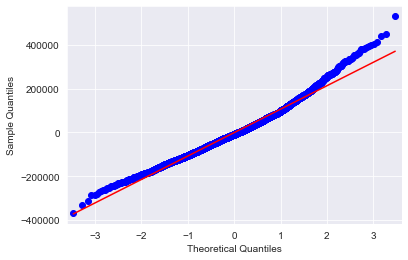

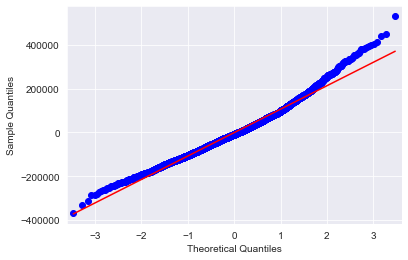

In [94]:
statsmodels.graphics.gofplots.qqplot(residuals_1, line = 'r')

Text(0.5, 1.0, 'First test residual')

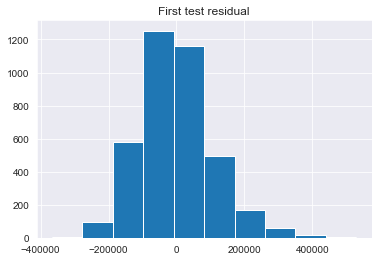

In [96]:
residuals_1.hist()
plt.title('First test residual')

In [278]:
np.sqrt(mse_test) / df_low_prices.price.mean()

0.23746064654303436

In [279]:
#
#
# binning the grade column

In [280]:
df_low_prices['grade_bin'] = pd.cut(df_low_prices['grade'], bins = [0,6,7,8,13], 
                                   labels = ['D', 'C', 'B', 'A'])

In [281]:
df_low_prices.grade_bin.value_counts()

C    8866
B    5627
A    2371
D    2299
Name: grade_bin, dtype: int64

In [282]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month,seasons,grade_bin
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,98178,47.5112,-122.257,2014-10-13,10,2014,59,Oct,fall,C
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,98125,47.7210,-122.319,2014-12-09,12,2014,63,Dec,winter,C
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,98028,47.7379,-122.233,2015-02-25,2,2015,82,Feb,winter,D
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,98136,47.5208,-122.393,2014-12-09,12,2014,49,Dec,winter,C
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,98074,47.6168,-122.045,2015-02-18,2,2015,28,Feb,winter,B


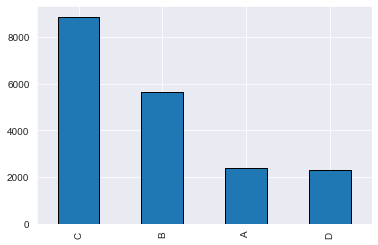

In [283]:
sns.set_style('darkgrid')
df_low_prices.grade_bin.value_counts().plot.bar(edgecolor = 'black', )


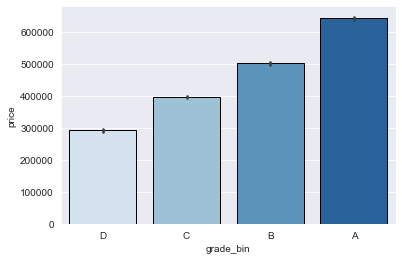

In [284]:
sns.barplot(x = 'grade_bin', y = 'price', data = df_low_prices, palette = 'Blues', edgecolor = 'black')
# plt.savefig('grade_bin.png')

In [285]:
df_low_prices.grade_bin.unique()

[C, D, B, A]
Categories (4, object): [D < C < B < A]

In [286]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month,seasons,grade_bin
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,98178,47.5112,-122.257,2014-10-13,10,2014,59,Oct,fall,C
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,98125,47.7210,-122.319,2014-12-09,12,2014,63,Dec,winter,C
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,98028,47.7379,-122.233,2015-02-25,2,2015,82,Feb,winter,D
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,98136,47.5208,-122.393,2014-12-09,12,2014,49,Dec,winter,C
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,98074,47.6168,-122.045,2015-02-18,2,2015,28,Feb,winter,B


In [287]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month,seasons,grade_bin
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,98178,47.5112,-122.257,2014-10-13,10,2014,59,Oct,fall,C
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,98125,47.7210,-122.319,2014-12-09,12,2014,63,Dec,winter,C
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,98028,47.7379,-122.233,2015-02-25,2,2015,82,Feb,winter,D
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,98136,47.5208,-122.393,2014-12-09,12,2014,49,Dec,winter,C
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,98074,47.6168,-122.045,2015-02-18,2,2015,28,Feb,winter,B


In [288]:
#
#
# making a model from the graded bins

In [289]:
outcome = 'price'

xcols = df_low_prices.dropna().drop(['price','id','date','date_dateformat','month','year',
                                       'age_sold','name_of_month','seasons'], axis = 1).columns
xcols

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'zipcode', 'lat',
       'long', 'grade_bin'],
      dtype='object')

In [290]:
predictors = '+'.join(xcols)

f = outcome + '~' + predictors

model_grade_bin = ols(formula = f, data = df_low_prices).fit()
model_grade_bin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2386.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:23:20   Log-Likelihood:            -2.4808e+05
No. Observations:               19163   AIC:                         4.962e+05
Df Residuals:                   19147   BIC:                         4.963e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.446e+06   1.51e+06     -3.605      0.000   -8.41e+06   -2.48e+06
grade_bin[T.C]  3.303e+04   4750.266      6.953      0.000    2.37e+04    4.23e+04
grade_bin[T.B]  7.588e+04   8127.108      9.336      0.000    5.99e+04    9.18e+04
grade_bin[T.A]  1.281e+05   1.25e+04     10.284      0.000    1.04e+05    1.53e+05
bedrooms       -1.076e+04   1107.826     -9.711      0.000   -1.29e+04   -8586.867
bathrooms       2.381e+04   1812.395     13.138      0.000    2.03e+04    2.74e+04
sqft_living       79.8297      1.901     41.986      0.000      76.103      83.557
sqft_lot           0.2271      0.020     11.214      0.000       0.187       0.267
floors          2.441e+04   1761.796     13.853      0.000     2.1e+04    2.79e+04
waterfront        2.1e+05   1.63e+04     12.855      0.000    1.78e+05    2.42e+05
condition       2.099e+04   1244.455     16.863      0.000    1.85e+04    2.34e+04
grade            3.51e+04   3615.803      9.706      0.000     2.8e+04    4.22e+04
yr_built       -1637.8411     39.053    -41.939      0.000   -1714.389   -1561.293
zipcode         -149.8034     17.556     -8.533      0.000    -184.215    -115.391
lat             5.108e+05   5507.260     92.758      0.000       5e+05    5.22e+05
long            8757.2207   6685.090      1.310      0.190   -4346.143    2.19e+04
==============================================================================
Omnibus:                      654.989   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              869.622
Skew:                           0.375   Prob(JB):                    1.46e-189
Kurtosis:                       3.725   Cond. No.                     2.05e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [291]:
#
#
# making qqplot from binned grade

In [292]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month,seasons,grade_bin
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,98178,47.5112,-122.257,2014-10-13,10,2014,59,Oct,fall,C
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,98125,47.7210,-122.319,2014-12-09,12,2014,63,Dec,winter,C
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,98028,47.7379,-122.233,2015-02-25,2,2015,82,Feb,winter,D
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,98136,47.5208,-122.393,2014-12-09,12,2014,49,Dec,winter,C
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,98074,47.6168,-122.045,2015-02-18,2,2015,28,Feb,winter,B


Train MSE: 10287434672.501415
Test MSE: 10660346796.501415
Train RMSE: 101426.99183403506
Test RMSE: 103248.95542571564


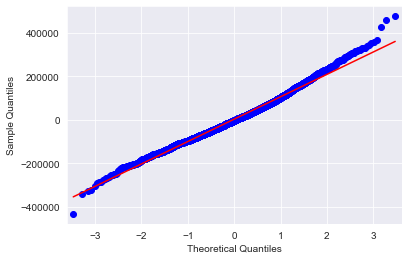

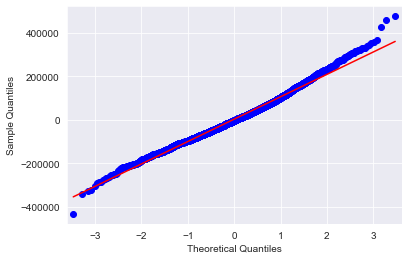

In [293]:
data = df_low_prices.copy()

y = data['price']
X = data.drop(['price','id','date','date_dateformat','month','year','grade_bin',
                                       'age_sold','name_of_month','seasons'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('Train RMSE:', np.sqrt(mse_train))
print('Test RMSE:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = 'r')

In [294]:
#
#
# getting dummies for zipcodes

In [295]:
zipcodes_dummies = pd.get_dummies(df_original['zipcode'], prefix = 'zipcode')

In [296]:
zipcodes_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 70 columns):
zipcode_98001    21597 non-null uint8
zipcode_98002    21597 non-null uint8
zipcode_98003    21597 non-null uint8
zipcode_98004    21597 non-null uint8
zipcode_98005    21597 non-null uint8
zipcode_98006    21597 non-null uint8
zipcode_98007    21597 non-null uint8
zipcode_98008    21597 non-null uint8
zipcode_98010    21597 non-null uint8
zipcode_98011    21597 non-null uint8
zipcode_98014    21597 non-null uint8
zipcode_98019    21597 non-null uint8
zipcode_98022    21597 non-null uint8
zipcode_98023    21597 non-null uint8
zipcode_98024    21597 non-null uint8
zipcode_98027    21597 non-null uint8
zipcode_98028    21597 non-null uint8
zipcode_98029    21597 non-null uint8
zipcode_98030    21597 non-null uint8
zipcode_98031    21597 non-null uint8
zipcode_98032    21597 non-null uint8
zipcode_98033    21597 non-null uint8
zipcode_98034    21597 non-null uint8
zipcode_98038    

In [297]:
df_zipcode_dummies = pd.concat([df_low_prices, zipcodes_dummies], axis = 1)

In [298]:
df_zipcode_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 92 columns):
id                 19163 non-null float64
date               19163 non-null object
price              19163 non-null float64
bedrooms           19163 non-null float64
bathrooms          19163 non-null float64
sqft_living        19163 non-null float64
sqft_lot           19163 non-null float64
floors             19163 non-null float64
waterfront         19163 non-null float64
condition          19163 non-null float64
grade              19163 non-null float64
yr_built           19163 non-null float64
zipcode            19163 non-null float64
lat                19163 non-null float64
long               19163 non-null float64
date_dateformat    19163 non-null datetime64[ns]
month              19163 non-null float64
year               19163 non-null float64
age_sold           19163 non-null float64
name_of_month      19163 non-null object
seasons            19163 non-null object
grade

In [299]:
#
#
# making model from df_zipcode_dummies

In [300]:
outcom = 'price'

x_cols = df_zipcode_dummies.drop(['price','id','date','zipcode','date_dateformat','month',
                                 'year','name_of_month','seasons','grade_bin'], axis = 1).columns

predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model_zd = ols(formula = f, data = df_zipcode_dummies).fit()
model_zd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     952.8
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:23:28   Log-Likelihood:            -2.4267e+05
No. Observations:               19163   AIC:                         4.855e+05
Df Residuals:                   19081   BIC:                         4.862e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.378e+07   3.85e+06    -13.979      0.000   -6.13e+07   -4.62e+07
bedrooms      -5703.6727    842.978     -6.766      0.000   -7355.983   -4051.362
bathrooms      9786.9331   1374.670      7.119      0.000    7092.458    1.25e+04
sqft_living     100.9454      1.460     69.149      0.000      98.084     103.807
sqft_lot          0.3304      0.016     20.485      0.000       0.299       0.362
floors          684.3347   1420.632      0.482      0.630   -2100.228    3468.898
waterfront     2.201e+05   1.28e+04     17.204      0.000    1.95e+05    2.45e+05
condition      1.841e+04    963.415     19.114      0.000    1.65e+04    2.03e+04
grade          4.847e+04    930.011     52.115      0.000    4.66e+04    5.03e+04
yr_built       1.959e+04   1192.277     16.433      0.000    1.73e+04    2.19e+04
lat            1.898e+05    3.2e+04      5.935      0.000    1.27e+05    2.52e+05
long          -4.801e+04   2.26e+04     -2.123      0.034   -9.23e+04   -3692.217
age_sold        2.02e+04   1192.018     16.942      0.000    1.79e+04    2.25e+04
zipcode_98001 -8.917e+05    5.4e+04    -16.516      0.000   -9.97e+05   -7.86e+05
zipcode_98002 -8.906e+05   5.32e+04    -16.748      0.000   -9.95e+05   -7.86e+05
zipcode_98003 -8.995e+05   5.47e+04    -16.435      0.000   -1.01e+06   -7.92e+05
zipcode_98004 -5.052e+05    5.6e+04     -9.018      0.000   -6.15e+05   -3.95e+05
zipcode_98005 -6.289e+05   5.54e+04    -11.363      0.000   -7.37e+05    -5.2e+05
zipcode_98006 -6.842e+05   5.43e+04    -12.601      0.000   -7.91e+05   -5.78e+05
zipcode_98007 -7.033e+05    5.5e+04    -12.799      0.000   -8.11e+05   -5.96e+05
zipcode_98008 -7.056e+05   5.45e+04    -12.957      0.000   -8.12e+05   -5.99e+05
zipcode_98010 -7.914e+05   5.03e+04    -15.723      0.000    -8.9e+05   -6.93e+05
zipcode_98011 -8.218e+05   5.76e+04    -14.274      0.000   -9.35e+05   -7.09e+05
zipcode_98014 -8.289e+05   5.17e+04    -16.024      0.000    -9.3e+05   -7.28e+05
zipcode_98019 -8.535e+05    5.4e+04    -15.816      0.000   -9.59e+05   -7.48e+05
zipcode_98022 -8.451e+05   4.92e+04    -17.194      0.000   -9.41e+05   -7.49e+05
zipcode_98023  -9.17e+05   5.55e+04    -16.518      0.000   -1.03e+06   -8.08e+05
zipcode_98024 -7.753e+05   5.14e+04    -15.097      0.000   -8.76e+05   -6.75e+05
zipcode_98027 -7.323e+05   5.22e+04    -14.028      0.000   -8.35e+05    -6.3e+05
zipcode_98028 -8.393e+05   5.82e+04    -14.420      0.000   -9.53e+05   -7.25e+05
zipcode_98029  -6.96e+05   5.21e+04    -13.350      0.000   -7.98e+05   -5.94e+05
zipcode_98030 -8.939e+05   5.32e+04    -16.800      0.000   -9.98e+05    -7.9e+05
zipcode_98031 -8.959e+05   5.34e+04    -16.771      0.000      -1e+06   -7.91e+05
zipcode_98032 -9.198e+05   5.48e+04    -16.779      0.000   -1.03e+06   -8.12e+05
zipcode_98033  -6.65e+05   5.63e+04    -11.812   

In [301]:
#
#
# making 4 sectors of the zipcodes

In [302]:
df_low_prices['lat_long'] = list(zip(df_low_prices.lat, df_low_prices.long))

In [303]:
df_low_prices['sector'] = df_low_prices['lat_long'].apply(lambda x: 'sector_1' if (x[0] >= 47.5) & (x[1] < -122.2)
                           else ('sector_2' if (x[0] >= 47.5) & (x[1] >=-122.2)
                           else ('sector_3' if (x[0] < 47.5) & (x[1] < -122.2)
                           else 'sector_4')))

In [304]:
df_bin_zip = df_low_prices

In [305]:
df_bin_zip.sector.value_counts()

sector_1    7756
sector_2    4867
sector_4    3491
sector_3    3049
Name: sector, dtype: int64

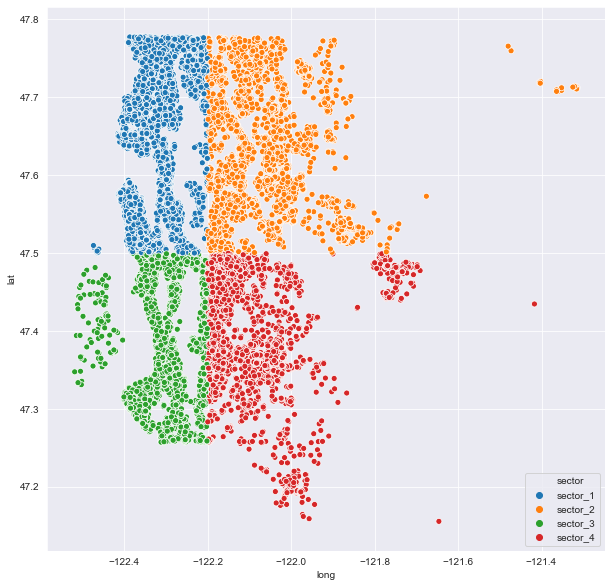

In [306]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'long', y = 'lat', hue = 'sector', data = df_bin_zip)
plt.legend(loc = 4)
# plt.savefig('sector_map.png')

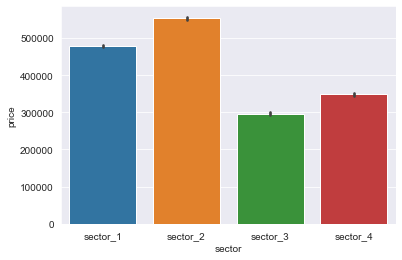

In [307]:
sns.barplot(x = 'sector', y = 'price', data = df_bin_zip)
# plt.savefig('sector_bar.png')

In [308]:
df_bin_zip.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,long,date_dateformat,month,year,age_sold,name_of_month,seasons,grade_bin,lat_long,sector
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,-122.257,2014-10-13,10,2014,59,Oct,fall,C,"(47.5112, -122.257)",sector_1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,-122.319,2014-12-09,12,2014,63,Dec,winter,C,"(47.721000000000004, -122.319)",sector_1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,-122.233,2015-02-25,2,2015,82,Feb,winter,D,"(47.7379, -122.23299999999999)",sector_1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,-122.393,2014-12-09,12,2014,49,Dec,winter,C,"(47.5208, -122.39299999999999)",sector_1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,-122.045,2015-02-18,2,2015,28,Feb,winter,B,"(47.6168, -122.045)",sector_2


In [309]:
#
#
# making regression model of df_bin_zip

In [310]:
outcome = 'price'
xcols = df_bin_zip.drop(['price','id','date','date_dateformat','month','year','age_sold',
                        'name_of_month','seasons','lat_long','grade_bin'], axis = 1).columns
xcols


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'zipcode', 'lat',
       'long', 'sector'],
      dtype='object')

In [311]:
predictors = '+'.join(xcols)
predictors

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+yr_built+zipcode+lat+long+sector'

In [312]:
f = outcome + '~' + predictors
f

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+yr_built+zipcode+lat+long+sector'

In [313]:
model_bin_zip = ols(formula = f, data = df_bin_zip).fit()
model_bin_zip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     2782.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:23:39   Log-Likelihood:            -2.4710e+05
No. Observations:               19163   AIC:                         4.942e+05
Df Residuals:                   19147   BIC:                         4.943e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6.836e+06   1.87e+06     -3.650      0.000   -1.05e+07   -3.16e+06
sector[T.sector_2]  2.865e+04   3032.739      9.447      0.000    2.27e+04    3.46e+04
sector[T.sector_3] -1.307e+05   3234.416    -40.403      0.000   -1.37e+05   -1.24e+05
sector[T.sector_4] -9.309e+04   3728.827    -24.966      0.000      -1e+05   -8.58e+04
bedrooms           -1.002e+04   1043.460     -9.607      0.000   -1.21e+04   -7979.699
bathrooms           1.937e+04   1709.462     11.332      0.000     1.6e+04    2.27e+04
sqft_living           86.6344      1.791     48.372      0.000      83.124      90.145
sqft_lot               0.2877      0.019     14.925      0.000       0.250       0.326
floors              1.978e+04   1683.746     11.747      0.000    1.65e+04    2.31e+04
waterfront          2.321e+05   1.55e+04     14.924      0.000    2.02e+05    2.63e+05
condition           1.983e+04   1187.785     16.696      0.000    1.75e+04    2.22e+04
grade                6.56e+04   1115.090     58.828      0.000    6.34e+04    6.78e+04
yr_built           -1403.6090     37.767    -37.165      0.000   -1477.636   -1329.582
zipcode              -70.2375     17.341     -4.050      0.000    -104.227     -36.248
lat                 1.697e+05   9053.020     18.740      0.000    1.52e+05    1.87e+05
long                -6.66e+04   9037.419     -7.370      0.000   -8.43e+04   -4.89e+04
==============================================================================
Omnibus:                      794.526   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1184.589
Skew:                           0.392   Prob(JB):                    5.88e-258
Kurtosis:                       3.932   Cond. No.                     2.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [314]:
#
#
# making qqplot

In [315]:
data = df_bin_zip.drop(['date_dateformat','month','year','age_sold','sector',
                        'name_of_month','seasons','lat_long','grade_bin'], axis = 1)

y = data['price']
X = data.drop(['price','id','date'], axis = 1)



In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)


In [317]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [318]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [319]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)


In [320]:
print('mse train:', mse_train)
print('mse test:', mse_test)


mse train: 10387717738.47925
mse test: 10250393535.786488


In [321]:
print('train rmse:', np.sqrt(mse_train))
print('test rmse:', np.sqrt(mse_test))

train rmse: 101920.15374046122
test rmse: 101244.22717264667


In [322]:
r2_score(y_test, y_hat_test)

0.6465681152399139

In [325]:
residuals_2 = (y_test - y_hat_test)

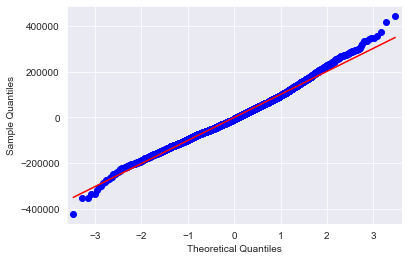

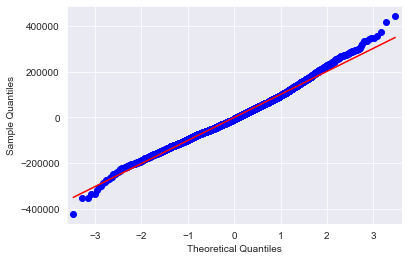

In [326]:
statsmodels.graphics.gofplots.qqplot(residuals_2, line = 'r')

Text(0.5, 1.0, 'Residual Histogram')

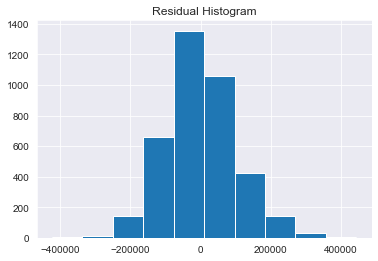

In [338]:
residuals_2.hist()
plt.title('Residual Histogram')

In [327]:
#
#
# finding what the price per sqft is per zipcode

In [328]:


df_low_prices['sqft_price'] = df_low_prices['price'] / df_low_prices['sqft_living']

zip_mean = df_low_prices.groupby('zipcode').mean()
zip_mean

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long,month,year,age_sold,sqft_price
zipcode,,,,,,,,,,,,,,,,,
98001,4.651274e+09,281194.869806,3.393352,2.011773,1903.783934,14967.002770,1.430748,0.000000,3.335180,7.296399,1980.867036,47.309106,-122.270704,6.567867,2014.321330,33.454294,151.347966
98002,4.850894e+09,234284.035176,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.000000,3.743719,6.693467,1967.773869,47.308780,-122.213357,6.698492,2014.336683,46.562814,151.174091
98003,4.689068e+09,291760.422939,3.354839,2.040323,1915.598566,10606.351254,1.308244,0.000000,3.372760,7.534050,1976.763441,47.315658,-122.309968,6.602151,2014.344086,37.580645,157.072283
98004,4.275247e+09,724470.439024,3.353659,1.743902,1757.439024,10379.463415,1.195122,0.000000,3.597561,7.402439,1959.390244,47.610707,-122.198963,6.743902,2014.268293,54.878049,447.904335
98005,5.366156e+09,675091.867257,3.716814,2.192478,2231.061947,13619.663717,1.159292,0.000000,3.725664,7.964602,1966.592920,47.604085,-122.168602,6.787611,2014.300885,47.707965,314.630707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,4.026798e+09,521969.447115,3.298077,1.909856,2003.942308,9577.644231,1.221154,0.000000,3.461538,7.600962,1959.427885,47.743174,-122.367880,6.692308,2014.278846,54.850962,275.104589
98178,4.276430e+09,300044.563707,3.305019,1.718147,1717.413127,8242.888031,1.179537,0.023166,3.324324,6.799228,1955.065637,47.499003,-122.247054,6.895753,2014.293436,59.227799,186.208846
98188,4.481851e+09,289078.345588,3.433824,1.863971,1802.772059,10126.080882,1.227941,0.000000,3.330882,7.036765,1965.507353,47.447310,-122.280993,6.205882,2014.389706,48.882353,169.007306


In [329]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,date_dateformat,month,year,age_sold,name_of_month,seasons,grade_bin,lat_long,sector,sqft_price
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,2014-10-13,10,2014,59,Oct,fall,C,"(47.5112, -122.257)",sector_1,188.050847
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,2014-12-09,12,2014,63,Dec,winter,C,"(47.721000000000004, -122.319)",sector_1,209.338521
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,2015-02-25,2,2015,82,Feb,winter,D,"(47.7379, -122.23299999999999)",sector_1,233.766234
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,2014-12-09,12,2014,49,Dec,winter,C,"(47.5208, -122.39299999999999)",sector_1,308.163265
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,2015-02-18,2,2015,28,Feb,winter,B,"(47.6168, -122.045)",sector_2,303.571429


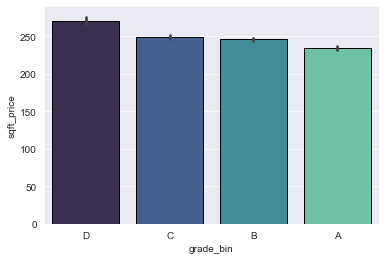

In [330]:
sns.set_style('darkgrid')
sns.barplot(x = 'grade_bin', y = 'sqft_price', data = df_low_prices, palette = 'mako',edgecolor = 'black')
# plt.savefig('sqft_grade.png')

In [331]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,date_dateformat,month,year,age_sold,name_of_month,seasons,grade_bin,lat_long,sector,sqft_price
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,2014-10-13,10,2014,59,Oct,fall,C,"(47.5112, -122.257)",sector_1,188.050847
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,2014-12-09,12,2014,63,Dec,winter,C,"(47.721000000000004, -122.319)",sector_1,209.338521
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,2015-02-25,2,2015,82,Feb,winter,D,"(47.7379, -122.23299999999999)",sector_1,233.766234
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,2014-12-09,12,2014,49,Dec,winter,C,"(47.5208, -122.39299999999999)",sector_1,308.163265
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,2015-02-18,2,2015,28,Feb,winter,B,"(47.6168, -122.045)",sector_2,303.571429


In [332]:
outcome = 'price'
xcols = df_low_prices.drop(['price', 'id', 'date', 'date_dateformat', 'month', 'year', 'age_sold',
                         'name_of_month', 'seasons','lat_long','grade_bin'], axis = 1).columns
predictors = '+'.join(xcols)

f = outcome + '~' + predictors


In [333]:
model_zip = ols(formula = f, data = df_low_prices).fit()
model_zip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.073e+04
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:24:14   Log-Likelihood:            -2.3615e+05
No. Observations:               19163   AIC:                         4.723e+05
Df Residuals:                   19146   BIC:                         4.725e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.404e+06   1.06e+06     -3.217      0.001   -5.48e+06   -1.33e+06
sector[T.sector_2]   2.36e+04   1713.469     13.770      0.000    2.02e+04     2.7e+04
sector[T.sector_3] -2.342e+04   1902.731    -12.308      0.000   -2.71e+04   -1.97e+04
sector[T.sector_4] -2.438e+04   2133.789    -11.425      0.000   -2.86e+04   -2.02e+04
bedrooms            6118.0820    594.869     10.285      0.000    4952.086    7284.078
bathrooms           1.325e+04    966.203     13.710      0.000    1.14e+04    1.51e+04
sqft_living          169.8690      1.092    155.503      0.000     167.728     172.010
sqft_lot               0.0674      0.011      6.157      0.000       0.046       0.089
floors              3689.0323    954.525      3.865      0.000    1818.079    5559.986
waterfront          4.172e+04   8834.870      4.722      0.000    2.44e+04     5.9e+04
condition           1.057e+04    672.579     15.716      0.000    9252.141    1.19e+04
grade               2.547e+04    660.502     38.558      0.000    2.42e+04    2.68e+04
yr_built            -370.3789     21.940    -16.882      0.000    -413.383    -327.375
zipcode               19.8926      9.806      2.029      0.043       0.671      39.114
lat                 5.658e+04   5144.836     10.998      0.000    4.65e+04    6.67e+04
long                7907.5255   5118.807      1.545      0.122   -2125.786    1.79e+04
sqft_price          1223.1431      6.052    202.110      0.000    1211.281    1235.005
==============================================================================
Omnibus:                     3771.402   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17404.395
Skew:                          -0.891   Prob(JB):                         0.00
Kurtosis:                       7.316   Cond. No.                     2.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
# 
# 
# separating categorical and continuous values

In [150]:
continuous = []
categorical = []

In [151]:
for col in df.columns:
    if (df[col].nunique() < 25):
        categorical.append(col)
    else:
        continuous.append(col)

In [152]:
continuous

['id',
 'date',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'yr_built',
 'zipcode',
 'lat',
 'long']

In [153]:
categorical

['bedrooms', 'floors', 'waterfront', 'condition', 'grade']

In [154]:
df_continuous = df.loc[:, continuous]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5a69adc18>,
      dtype=object)

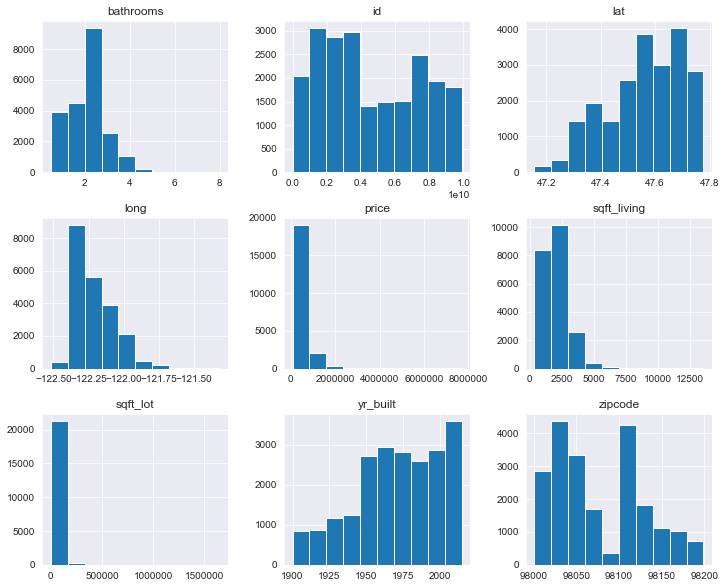

In [155]:
df_continuous.hist(figsize = (12,10))

In [156]:
df_categorical = df.loc[:, categorical]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5a70a0588>,
      dtype=object)

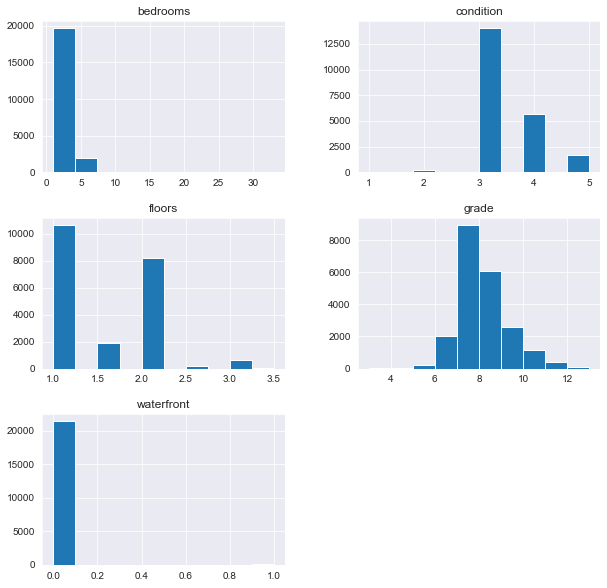

In [157]:
df_categorical.hist(figsize = (10,10))

In [158]:
df_continuous.nunique()

id             21420
date             372
price           3622
bathrooms         29
sqft_living     1034
sqft_lot        9776
yr_built         116
zipcode           70
lat             5033
long             751
dtype: int64

In [159]:
df_categorical.nunique()

bedrooms      12
floors         6
waterfront     2
condition      5
grade         11
dtype: int64

In [160]:
df_cont = df[continuous]

In [161]:
df_cat = df[categorical]

In [162]:
df_cont

,id,date,price,bathrooms,sqft_living,sqft_lot,yr_built,zipcode,lat,long
0,7129300520,10/13/2014,221900.0,1.00,1180,5650,1955,98178,47.5112,-122.257
1,6414100192,12/9/2014,538000.0,2.25,2570,7242,1951,98125,47.7210,-122.319
2,5631500400,2/25/2015,180000.0,1.00,770,10000,1933,98028,47.7379,-122.233
3,2487200875,12/9/2014,604000.0,3.00,1960,5000,1965,98136,47.5208,-122.393
4,1954400510,2/18/2015,510000.0,2.00,1680,8080,1987,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,2.50,1530,1131,2009,98103,47.6993,-122.346
21593,6600060120,2/23/2015,400000.0,2.50,2310,5813,2014,98146,47.5107,-122.362
21594,1523300141,6/23/2014,402101.0,0.75,1020,1350,2009,98144,47.5944,-122.299
21595,291310100,1/16/2015,400000.0,2.50,1600,2388,2004,98027,47.5345,-122.069


In [163]:
df_cat


,bedrooms,floors,waterfront,condition,grade
0,3,1.0,0.0,3,7
1,3,2.0,0.0,3,7
2,2,1.0,0.0,3,6
3,4,1.0,0.0,5,7
4,3,1.0,0.0,3,8
...,...,...,...,...,...
21592,3,3.0,0.0,3,8
21593,4,2.0,0.0,3,8
21594,2,2.0,0.0,3,7
21595,3,2.0,0.0,3,8


In [164]:
df_zipcodes.head()

NameError: name 'df_zipcodes' is not defined

In [ ]:
df_original.head()